# 🛳 Titanic Dataset Analysis – Exploratory Data Analysis (EDA)

> A complete data exploration including cleaning, insights, and visualization of the Titanic dataset.


## 1️⃣ Data Cleaning

In this stage, we handled missing values and corrected data types to prepare the dataset for analysis:

- **Age:** Filled missing values with the median age.  
- **Cabin:** Dropped column due to high percentage of missing values.  
- **Embarked:** Filled missing values with the most frequent port (mode).  
- **Checked and cleaned:** Sex, Pclass, Ticket, and other features.


In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
df = pd.read_csv("train.csv")

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [49]:
df['Age'].fillna(df['Age'].median(), inplace=True)

df['Age'].isnull().sum()

C:\Users\esmai\AppData\Local\Temp\ipykernel_14048\591780994.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


0

In [50]:
missing_percentage = (df['Cabin'].isnull().sum() / df['PassengerId'].count()) * 100
print(f"Cabin missing values percentage: {missing_percentage:.2f}%")


Cabin missing values percentage: 77.10%


In [51]:
df.drop(columns=['Cabin'], inplace=True)
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [52]:
print(df['Embarked'].value_counts())
print("Missing values in Embarked:", df['Embarked'].isnull().sum())


Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
Missing values in Embarked: 2


In [53]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

df['Embarked'].isnull().sum()

C:\Users\esmai\AppData\Local\Temp\ipykernel_14048\1467272240.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


0

In [54]:
df['Pclass'] = df['Pclass'].astype(int)
df['Pclass'] = df['Pclass'].map({1: 'First', 2: 'Second', 3: 'Third'})

df['Pclass'] = df['Pclass'].astype('category')
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')

print("Pclass unique values:", df['Pclass'].unique())
print("Sex unique values:", df['Sex'].unique())
print("Embarked unique values:", df['Embarked'].unique())


Pclass unique values: ['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']
Sex unique values: ['male', 'female']
Categories (2, object): ['female', 'male']
Embarked unique values: ['S', 'C', 'Q']
Categories (3, object): ['C', 'Q', 'S']


In [55]:
print("Missing values after cleaning:")
print(df.isnull().sum())

df.info()


Missing values after cleaning:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(3), float64(2), int64(4), object(2)
memory usage: 58.8+ KB


## 2️⃣ Exploratory Data Analysis (EDA)

We calculated key metrics (KPIs) and performed group-based insights:

- **Overall Survival Rate**  
- **Survival Rate by Gender**  
- **Survival Rate by Passenger Class**  
- **Survival Rate by Embarkation Port**  
- **Average Age by Survival**

These insights help understand the patterns of survival in the Titanic dataset.


In [56]:
df.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [57]:
survival_rate = df['Survived'].mean() * 100
not_survival_rate = 100 - survival_rate

print("="*50)
print("🔹 TITANIC SURVIVAL 🔹".center(50))
print("="*50)
print(f"✅ Overall Survival Rate : {survival_rate:6.2f}%")
print(f"❌ Non-Survival Rate    : {not_survival_rate:6.2f}%")
print("="*50)

               🔹 TITANIC SURVIVAL 🔹               
✅ Overall Survival Rate :  38.38%
❌ Non-Survival Rate    :  61.62%


In [58]:
survival_by_gender = df.groupby('Sex')['Survived'].mean() * 100

print("="*50)
print("🔹 TITANIC SURVIVAL BY GENDER 🔹".center(50))
print("="*50)
for gender, rate in survival_by_gender.items():
    icon = "👩" if gender == "female" else "👨"
    print(f"{icon} {gender.capitalize():<10} : {rate:6.2f}%")
print("="*50)


          🔹 TITANIC SURVIVAL BY GENDER 🔹          
👩 Female     :  74.20%
👨 Male       :  18.89%


C:\Users\esmai\AppData\Local\Temp\ipykernel_14048\935560292.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_gender = df.groupby('Sex')['Survived'].mean() * 100


In [59]:
survival_by_class = df.groupby('Pclass')['Survived'].mean() * 100

print("="*55)
print("🔹 TITANIC SURVIVAL BY CLASS 🔹".center(55))
print("="*55)

class_labels = {1: "First", 2: "Second", 3: "Third"}
icons = {1: "🥇", 2: "🥈", 3: "🥉"}

for pclass, rate in survival_by_class.items():
    label = class_labels.get(pclass, f"Class {pclass}")
    icon = icons.get(pclass, "🚢")
    print(f"{icon} {label:<10} : {rate:6.2f}%")

print("="*55)


             🔹 TITANIC SURVIVAL BY CLASS 🔹             
🚢 Class First :  62.96%
🚢 Class Second :  47.28%
🚢 Class Third :  24.24%


C:\Users\esmai\AppData\Local\Temp\ipykernel_14048\3886826711.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_class = df.groupby('Pclass')['Survived'].mean() * 100


In [60]:
survival_by_port = df.groupby('Embarked')['Survived'].mean() * 100

print("="*60)
print("🛳️ TITANIC SURVIVAL BY EMBARKATION PORT 🛳️".center(60))
print("="*60)

port_labels = {"C": "Cherbourg", "Q": "Queenstown", "S": "Southampton"}
icons = {"C": "⚓", "Q": "⛵", "S": "🚢"}

for port, rate in survival_by_port.items():
    label = port_labels.get(port, f"Port {port}")
    icon = icons.get(port, "🛳️")
    print(f"{icon} {label:<12} : {rate:6.2f}%")

print("="*60)


         🛳️ TITANIC SURVIVAL BY EMBARKATION PORT 🛳️         
⚓ Cherbourg    :  55.36%
⛵ Queenstown   :  38.96%
🚢 Southampton  :  33.90%


C:\Users\esmai\AppData\Local\Temp\ipykernel_14048\3466676752.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_port = df.groupby('Embarked')['Survived'].mean() * 100


In [61]:
avg_age_survival = df.groupby('Survived')['Age'].mean()

print("="*60)
print("🧑‍👩‍👧 TITANIC SURVIVAL BY AGE 🧑‍👩‍👧".center(60))
print("="*60)

labels = {0: "Did Not Survive", 1: "Survived"}
icons = {0: "❌", 1: "✅"}

for status, avg_age in avg_age_survival.items():
    label = labels.get(status, f"Status {status}")
    icon = icons.get(status, "👤")
    print(f"{icon} {label:<15} : {avg_age:5.2f} years")

print("="*60)


            🧑‍👩‍👧 TITANIC SURVIVAL BY AGE 🧑‍👩‍👧             
❌ Did Not Survive : 30.03 years
✅ Survived        : 28.29 years


## 3️⃣ Visualization

We visualized the dataset to uncover patterns and relationships:

- **Barplots** for survival by Gender and Passenger Class  
- **Horizontal Barplot** for a clearer view of class survival rates  
- **Stacked Histogram** with KDE for Age distribution by Survival  
- **Clustered Barplot (Catplot)** for Survival by Class & Gender  
- **Correlation Heatmap** to explore relationships among numeric features

These visualizations provide an intuitive understanding of the data.


C:\Users\esmai\AppData\Local\Temp\ipykernel_14048\2485327369.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_survival = df.groupby("Sex")["Survived"].mean() * 100
C:\Users\esmai\AppData\Local\Temp\ipykernel_14048\2485327369.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


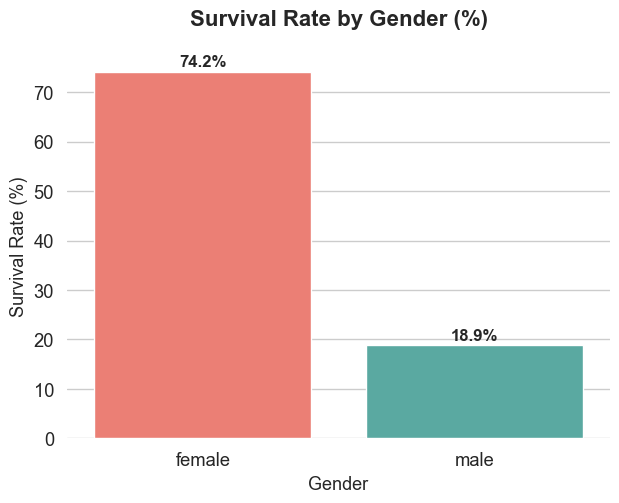

In [62]:
sns.set_theme(style="whitegrid", font_scale=1.2)

gender_survival = df.groupby("Sex")["Survived"].mean() * 100

plt.figure(figsize=(7,5))
ax = sns.barplot(
    x=gender_survival.index, 
    y=gender_survival.values, 
    palette=["#FF6F61", "#4DB6AC"]
)

for i, v in enumerate(gender_survival.values):
    ax.text(i, v + 1, f"{v:.1f}%", ha="center", fontsize=12, fontweight="bold")

plt.title("Survival Rate by Gender (%)", fontsize=16, fontweight="bold", pad=20)
plt.ylabel("Survival Rate (%)", fontsize=13)
plt.xlabel("Gender", fontsize=13)

sns.despine(left=True, bottom=True)

plt.show()


C:\Users\esmai\AppData\Local\Temp\ipykernel_14048\375605187.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  class_survival = df.groupby("Pclass")["Survived"].mean() * 100
C:\Users\esmai\AppData\Local\Temp\ipykernel_14048\375605187.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


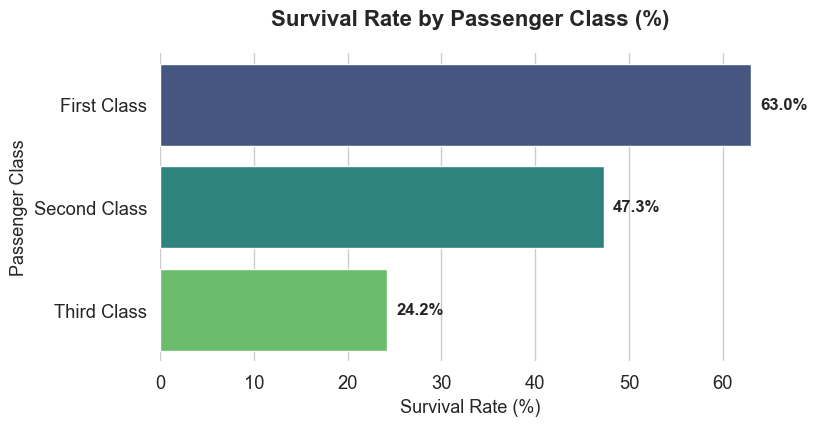

In [63]:
class_survival = df.groupby("Pclass")["Survived"].mean() * 100

plt.figure(figsize=(8,4))
ax = sns.barplot(
    x=class_survival.values, 
    y=["First Class", "Second Class", "Third Class"], 
    palette="viridis",
    orient='h'
)

for i, v in enumerate(class_survival.values):
    ax.text(v + 1, i, f"{v:.1f}%", va='center', fontsize=12, fontweight='bold')

plt.title("Survival Rate by Passenger Class (%)", fontsize=16, fontweight="bold", pad=20)
plt.xlabel("Survival Rate (%)", fontsize=13)
plt.ylabel("Passenger Class", fontsize=13)

sns.despine(left=True, bottom=True)

plt.show()


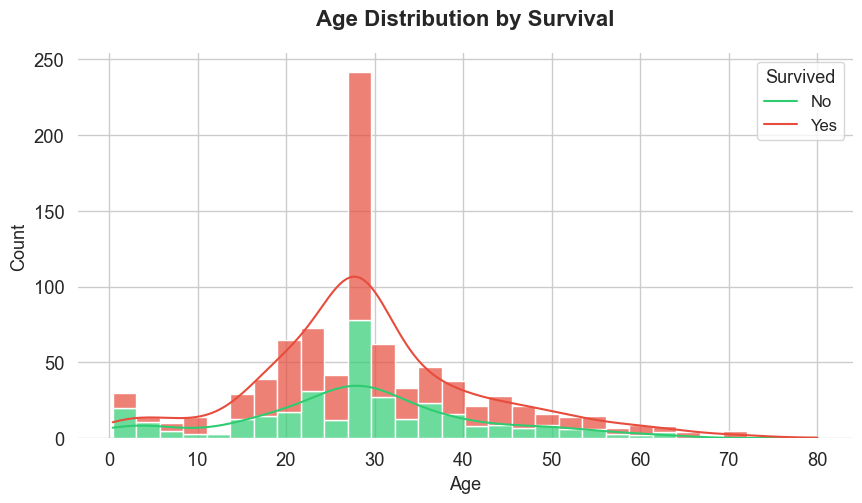

In [64]:
sns.set_theme(style="whitegrid", font_scale=1.2)

plt.figure(figsize=(10,5))
ax = sns.histplot(
    data=df,
    x='Age',
    hue='Survived',
    bins=30,
    kde=True,
    multiple='stack',
    palette={0: "#e74c3c", 1: "#2ecc71"},
    alpha=0.7
)

plt.title("Age Distribution by Survival", fontsize=16, fontweight="bold", pad=20)
plt.xlabel("Age", fontsize=13)
plt.ylabel("Count", fontsize=13)

plt.legend(title="Survived", labels=["No", "Yes"], fontsize=12, title_fontsize=13)

sns.despine(left=True, bottom=True)

plt.show()


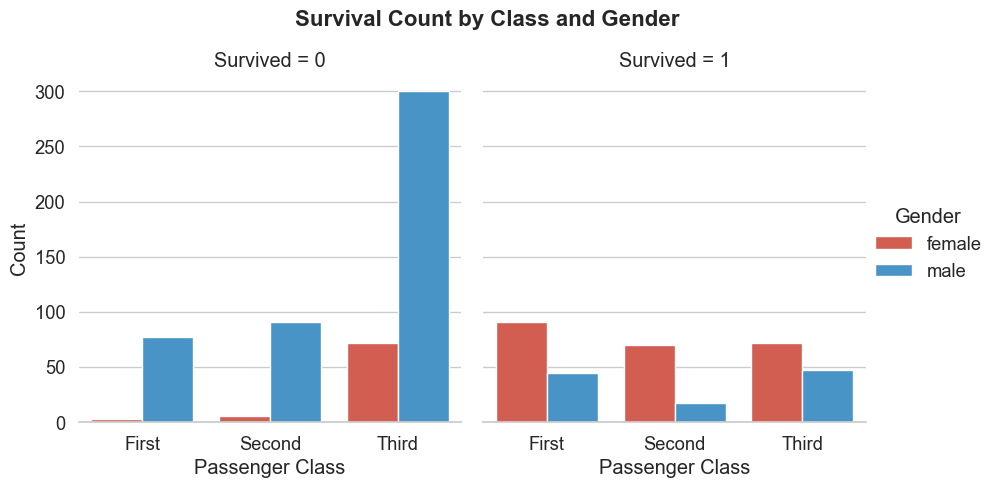

In [65]:
sns.set_theme(style="whitegrid", font_scale=1.2)

g = sns.catplot(
    x="Pclass",
    hue="Sex",
    col="Survived",
    data=df,
    kind="count",
    height=5,
    aspect=0.9,
    palette={"male": "#3498db", "female": "#e74c3c"}
)

g.set_titles(col_template="Survived = {col_name}")
g.set_axis_labels("Passenger Class", "Count")

g._legend.set_title("Gender")

plt.subplots_adjust(top=0.85)
g.fig.suptitle("Survival Count by Class and Gender", fontsize=16, fontweight="bold")

sns.despine(left=True)

plt.show()


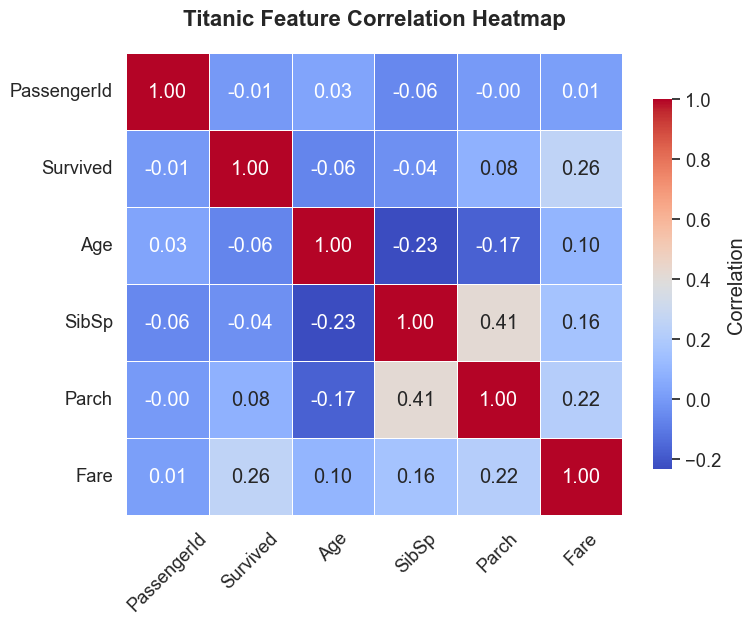

In [66]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(8,6))
sns.set_theme(style="whitegrid", font_scale=1.2)

ax = sns.heatmap(
    corr,
    annot=True,            
    fmt=".2f",              
    cmap="coolwarm",         
    linewidths=0.5,        
    linecolor='white',
    cbar_kws={"shrink":0.8, "label":"Correlation"}  
)

plt.title("Titanic Feature Correlation Heatmap", fontsize=16, fontweight="bold", pad=20)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

sns.despine(left=True, bottom=True)
plt.show()
